In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\Users\Arvind Vasa\AppData\Local\Temp\ipykernel_19184\1695053793.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv(r"F:\AI-ML\Adv Ai&ML WKDY-MR 2023\4. NLP\4th April 2023\spam.tsv", sep= '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
# checking class imbalance
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
ham= df[df['label']=='ham']
spam= df[df['label']=='spam']

In [15]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
# oversampling : ham- 4825, spam- 4825 ,total- 9650
# target is minority class
# spam= spam.sample(ham.shape[0], replace= True)
# spam.shape

(4825, 4)

In [16]:
#  undersampling : ham- 747, spam- 747 ,total- 1494
# target is majority class
ham= ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [18]:
data= pd.concat([ham, spam], ignore_index=True)

In [20]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [21]:
data.shape

(1494, 4)

<Axes: xlabel='label', ylabel='length'>

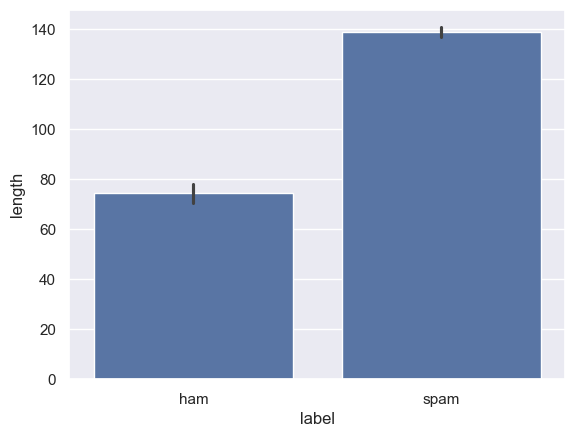

In [23]:
sns.barplot(x= data['label'], y= data['length'])

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(data['message'], data['label'], test_size=0.2, random_state=101)
x_train.head()

1260    Oh my god! I've found your number again! I'm s...
1167    Free entry in 2 a weekly comp for a chance to ...
1092    U have won a nokia 6230 plus a free digital ca...
637       Yeah probably, I still gotta check out with leo
782     Text & meet someone sexy today. U can find a d...
Name: message, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [28]:
classifier= Pipeline(
    steps=[
        ('tf_idf', TfidfVectorizer()),
        ('RandomForest', RandomForestClassifier())
    ]
)
classifier

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [29]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [31]:
y_pred_train= classifier.predict(x_train)
y_pred_test= classifier.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, 

In [35]:
accuracy_score(y_pred_train, y_train)

1.0

In [36]:
accuracy_score(y_pred_test, y_test)

0.9498327759197325

In [37]:
confusion_matrix(y_pred_test, y_test)

array([[153,  15],
       [  0, 131]], dtype=int64)

In [38]:
classification_report(y_pred_test, y_test)

'              precision    recall  f1-score   support\n\n         ham       1.00      0.91      0.95       168\n        spam       0.90      1.00      0.95       131\n\n    accuracy                           0.95       299\n   macro avg       0.95      0.96      0.95       299\nweighted avg       0.95      0.95      0.95       299\n'

In [44]:
test= [ 'Hello, Hope you are doing well', 'Congratualations, You won a lottory worth $100 Millions ! To claim call @111', 'Hi, hope you all are enjoying with NLP concept and you apply the same concept in your organization']

for msg in test:
    print(classifier.predict([msg]))

['ham']
['spam']
['ham']


In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(actual, predicted):
    accuracy= accuracy_score(actual, predicted)
    con_mat= confusion_matrix(actual, predicted)
    classi_report= classification_report(actual, predicted)

    return accuracy, con_mat, classi_report

## Naive bayes

In [50]:
data['message'][0]

'Hey! do u fancy meetin me at 4 at cha \x96 hav a lil beverage on me. if not txt or ring me and we can meet up l8r. quite tired got in at 3 v.pist ;) love Pete x x x'

In [54]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps= PorterStemmer()
corpus= []

for i in range(0, len(data)):
    review= re.sub(r'[^a-zA-Z\s]', '', data['message'][i])
    review= review.lower()
    review= review.split()
    review= [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review= ' '.join(review)
    corpus.append(review)
corpus

[nltk_data] Downloading package stopwords to C:\Users\Arvind
[nltk_data]     Vasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hey u fanci meetin cha hav lil beverag txt ring meet lr quit tire got vpist love pete x x x',
 'thanx day u r goodmat think ur rite sari asusu u cheer love u franyxxxxx',
 'great get worri know wonder care person like best life know u r wonder god love',
 'haha okay today weekend leh',
 'ill post lr class',
 'free today haf pick parent tonit',
 'mean left earli check co im work',
 'much would cost hire hitman',
 'gud mrng dear nice day',
 'sent email address incomm right',
 'want final lunch today',
 'reassur crazi world',
 'yep like pink furnitur tho',
 'im good movi ok leav hourish',
 'fetch yun u fetch',
 'thank ill keep mind',
 'oh god im gonna googl nearbi cliff',
 'wat make peopl dearer de happi dat u feel u meet de pain u feel u miss dem',
 'yeah got v apologet n fallen actin like spoilt child got caught till wont go badli cheer',
 'bill that bad',
 'oclock mine bash flat plan',
 'enjoy urself tmr',
 'good afternoon starshin how boytoy crave yet ach fuck sip cappuccino miss ba

In [55]:
tfidf= TfidfVectorizer()
x= tfidf.fit_transform(corpus).toarray()

In [60]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=101)

In [71]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model= MultinomialNB().fit(x_train, y_train)
y_pred_train_nb= spam_detect_model.predict(x_train)
y_pred_test_nb= spam_detect_model.predict(x_test)

In [75]:
evaluate_model(y_pred_train_nb, y_train)

(0.9866108786610879,
 array([[586,   8],
        [  8, 593]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       594\n           1       0.99      0.99      0.99       601\n\n    accuracy                           0.99      1195\n   macro avg       0.99      0.99      0.99      1195\nweighted avg       0.99      0.99      0.99      1195\n')

In [76]:
evaluate_model(y_pred_test_nb, y_test)

(0.9498327759197325,
 array([[150,  12],
        [  3, 134]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.93      0.95       162\n           1       0.92      0.98      0.95       137\n\n    accuracy                           0.95       299\n   macro avg       0.95      0.95      0.95       299\nweighted avg       0.95      0.95      0.95       299\n')